In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report

from matplotlib import pyplot as plt
import numpy as np

In [23]:
?datasets.make_blobs

In [31]:
X, y = datasets.make_blobs(n_samples=250, cluster_std=2)

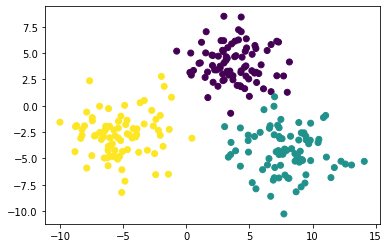

In [32]:
plt.scatter(X[:,0], X[:,1], c = y);

In [3]:
X.shape, y.shape

((100, 2), (100,))

In [5]:
import pandas

In [13]:
?pandas.DataFrame.to_csv

In [33]:
pandas.DataFrame(X, columns=['x', 'y']).assign(label=y).to_csv('blobs3.csv', index=False)

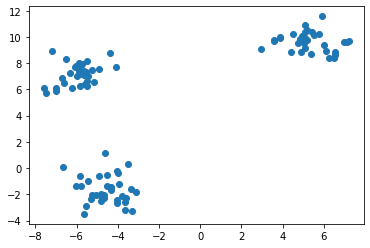

In [8]:
plt.scatter(X[:,0], X[:,1]);

In [9]:
kmeans = KMeans(n_clusters=3)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
kmeans.fit(X_train)

KMeans(n_clusters=3)

In [12]:
kmeans.predict(X_train)

array([0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2,
       1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2,
       0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0], dtype=int32)

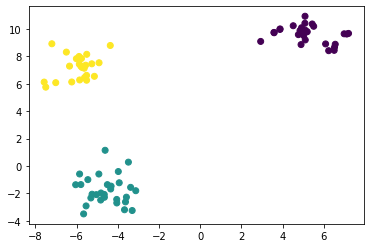

In [15]:
plt.scatter(X_train[:,0], X_train[:,1], c = kmeans.predict(X_train))

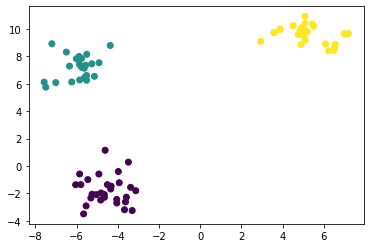

In [17]:
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)

In [18]:
y_train

array([2, 0, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 2, 1,
       0, 1, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1,
       2, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2])

In [19]:
kmeans.predict(X_train)

array([0, 1, 0, 1, 2, 1, 2, 1, 1, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2,
       1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 1,
       0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2,
       0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 0], dtype=int32)

In [21]:
confusion_matrix(y_train, kmeans.predict(X_train))

array([[ 0, 29,  0],
       [ 0,  0, 24],
       [27,  0,  0]])

In [23]:
print(classification_report(y_train, kmeans.predict(X_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      29.0
           1       0.00      0.00      0.00      24.0
           2       0.00      0.00      0.00      27.0

    accuracy                           0.00      80.0
   macro avg       0.00      0.00      0.00      80.0
weighted avg       0.00      0.00      0.00      80.0



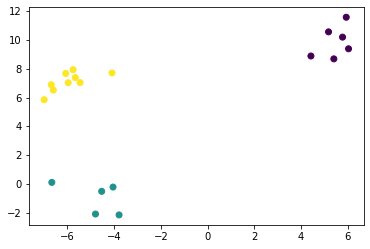

In [24]:
plt.scatter(X_test[:,0], X_test[:,1], c = kmeans.predict(X_test))

# clustering the moons

In [64]:
X, y = datasets.make_moons(n_samples=1000, noise=0.1, random_state=10101)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [66]:
kmeans2 = KMeans(n_clusters=2)

In [67]:
kmeans2.fit(X_train)

KMeans(n_clusters=2)

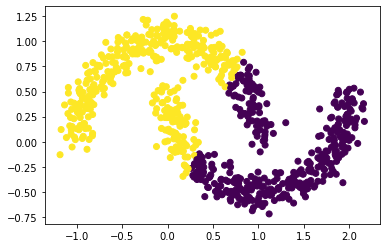

In [68]:
plt.scatter(X_train[:,0], X_train[:,1], c = kmeans2.predict(X_train))

In [69]:
kmeans.inertia_

33.90261212795658

In [70]:
kmeans2.inertia_

331.6682325423525

In [71]:
silhouette_score(X_test, kmeans2.predict(X_test))

0.4935359849290735

In [72]:
sil = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k) # making a new model instance
    kmeans.fit(X_train)
    sil.append(silhouette_score(X_test, kmeans.predict(X_test)))

In [73]:
sil

[0.4935359849290735,
 0.4268678454565713,
 0.43028880958894467,
 0.4518517301768575,
 0.4935987098501991,
 0.501835484875743,
 0.46586516491415236,
 0.4643589516365736,
 0.43537281401834116]

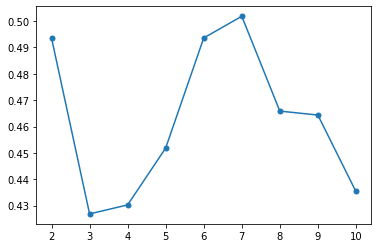

In [77]:
plt.plot(range(2, 11), sil, '.-', ms = 10)

In [78]:
kmeans7 = KMeans(n_clusters=7)

In [80]:
kmeans7.fit(X_train)

KMeans(n_clusters=7)

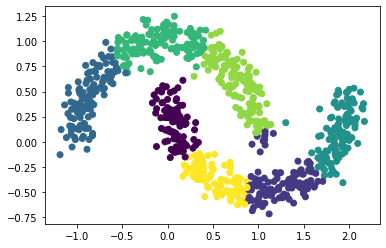

In [81]:
plt.scatter(X_train[:,0], X_train[:,1], c = kmeans7.predict(X_train))

## Clustering digits

In [82]:
mnist = datasets.fetch_openml('mnist_784', version = 1)

In [83]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [84]:
X_train, X_test, y_train, y_test = train_test_split(mnist['data'].values,
                                                    mnist['target'].values,
                                                    test_size=0.2,
                                                    random_state=10101)

In [85]:
kmeans = KMeans(n_clusters=10)

In [86]:
kmeans.fit(X_train)

KMeans(n_clusters=10)

In [88]:
y_test_clust = kmeans.predict(X_test)

In [90]:
y_test_clust == 3

array([ True, False, False, ..., False, False, False])

In [93]:
X_cluster_3 = X_test[y_test_clust == 3]

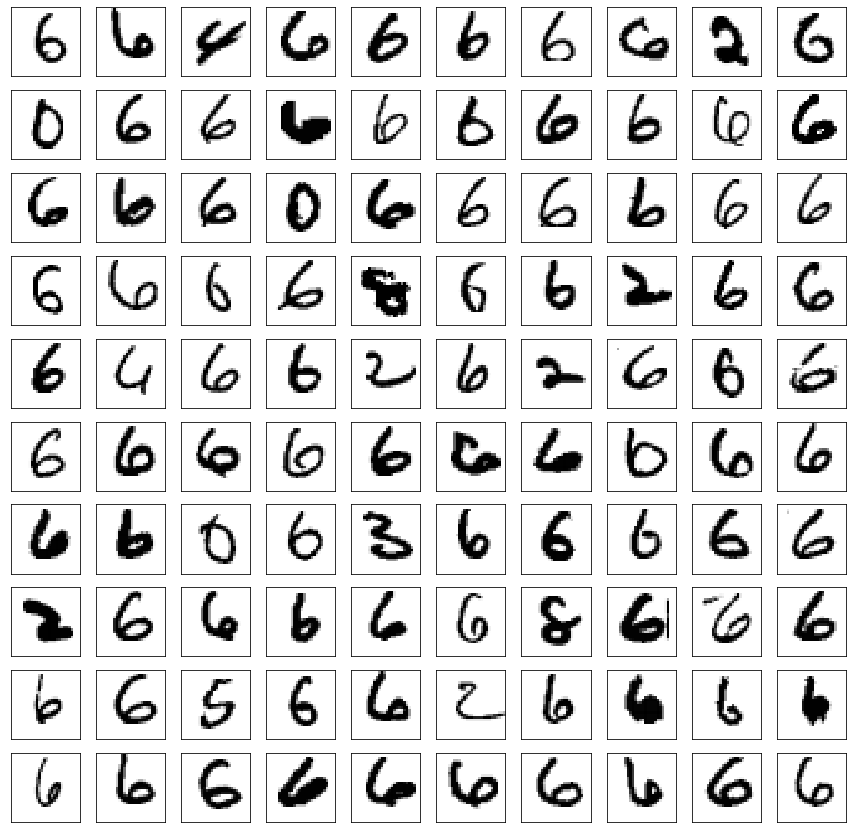

In [95]:
fig = plt.figure(figsize = (15, 15))

for i in range(100):
    fig.add_subplot(10, 10, i+1, xticks = [], yticks = [])
    plt.imshow(X_cluster_3[i].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')

In [96]:
def plot_digits_in_cluster(k=0):

    X_cluster_k = X_test[y_test_clust == k]
    
    fig = plt.figure(figsize = (15, 15))

    for i in range(100):
        fig.add_subplot(10, 10, i+1, xticks = [], yticks = [])
        plt.imshow(X_cluster_k[i].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')

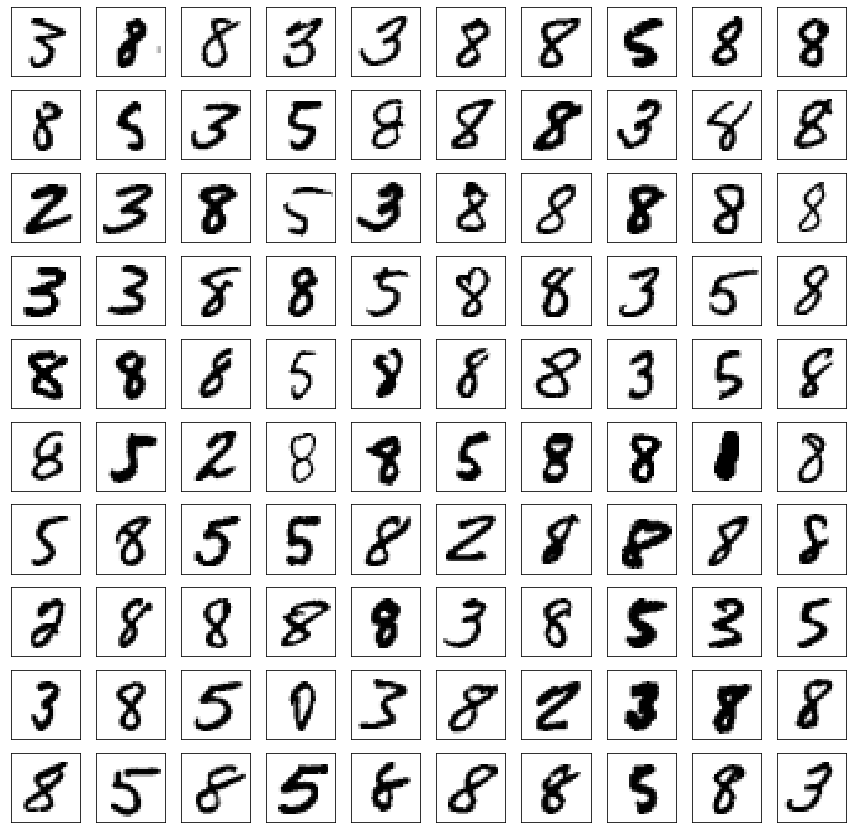

In [97]:
plot_digits_in_cluster(0)

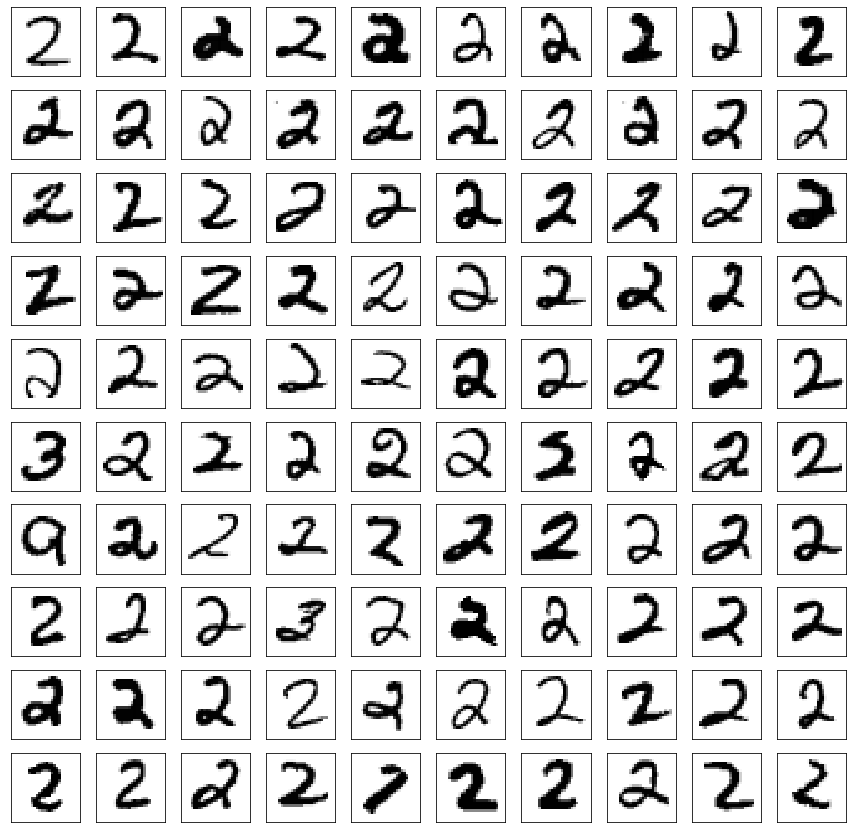

In [98]:
plot_digits_in_cluster(1)

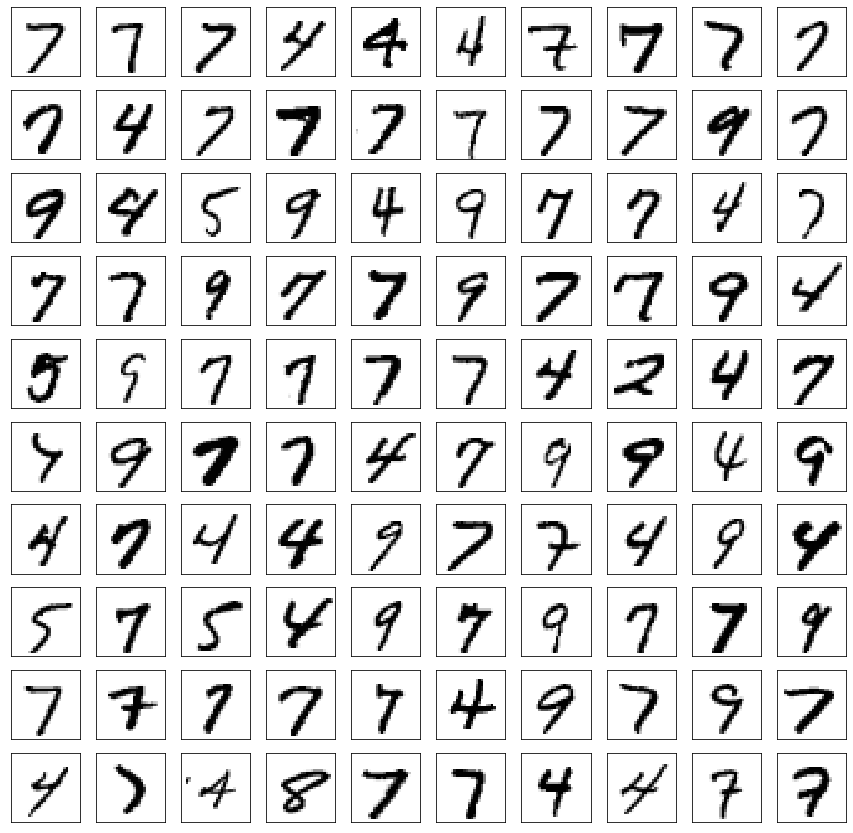

In [99]:
plot_digits_in_cluster(2)

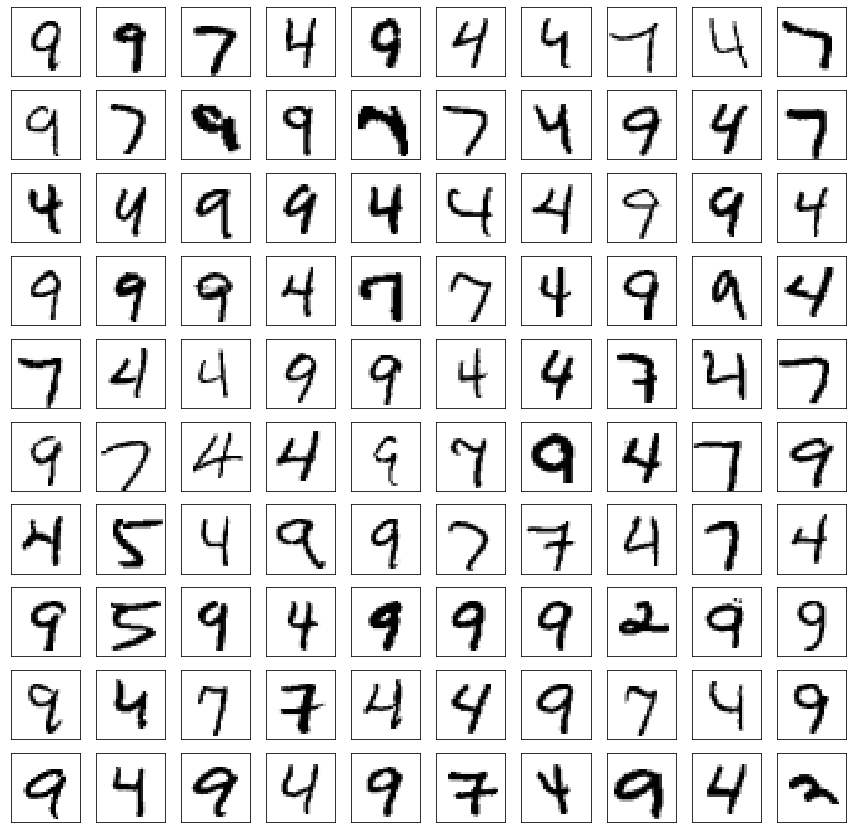

In [100]:
plot_digits_in_cluster(9)

In [101]:
def plot_digits_in_cluster(k=0): 
    X_cluster_k = X_test[y_test_clust == k] 
    fig = plt.figure(figsize = (15, 15)) 
    
    for i in range (100): 
        fig.add_subplot(10, 10, i+1, xticks = [], yticks = []) 
        plt.imshow(X_cluster_k[i].reshape(28,28), cmap=plt.cm.binary, interpolation='nearest') 

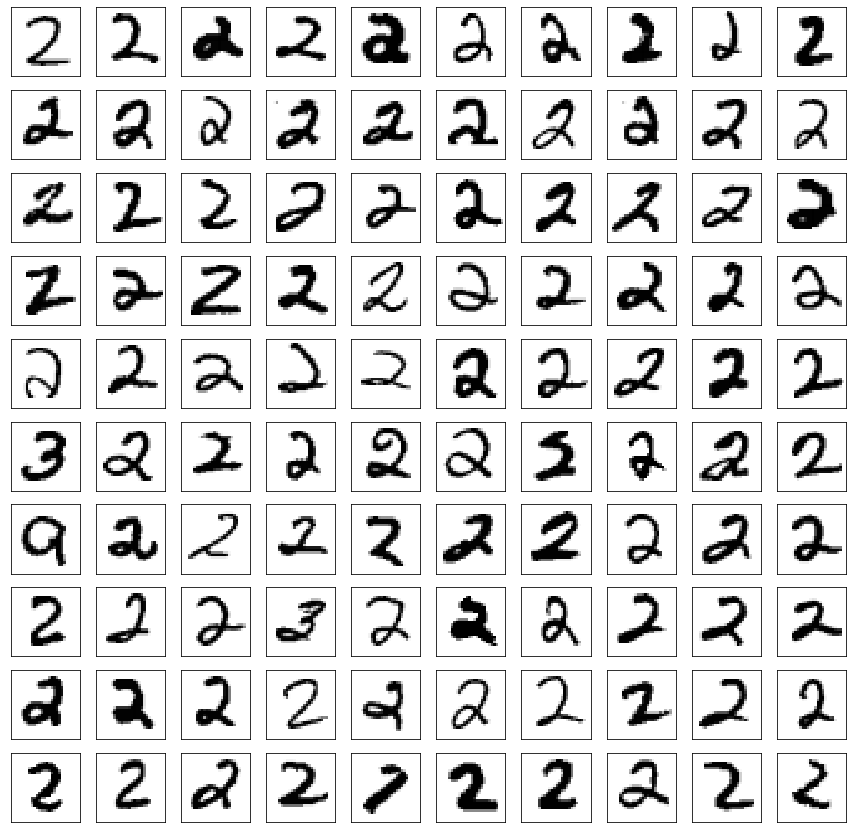

In [102]:
plot_digits_in_cluster(1)

In [103]:
kmeans = KMeans(n_clusters=2)

In [104]:
kmeans.fit(X_train)

KMeans(n_clusters=2)

In [105]:
y_test_clust = kmeans.predict(X_test)

In [108]:
y_test_clust

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

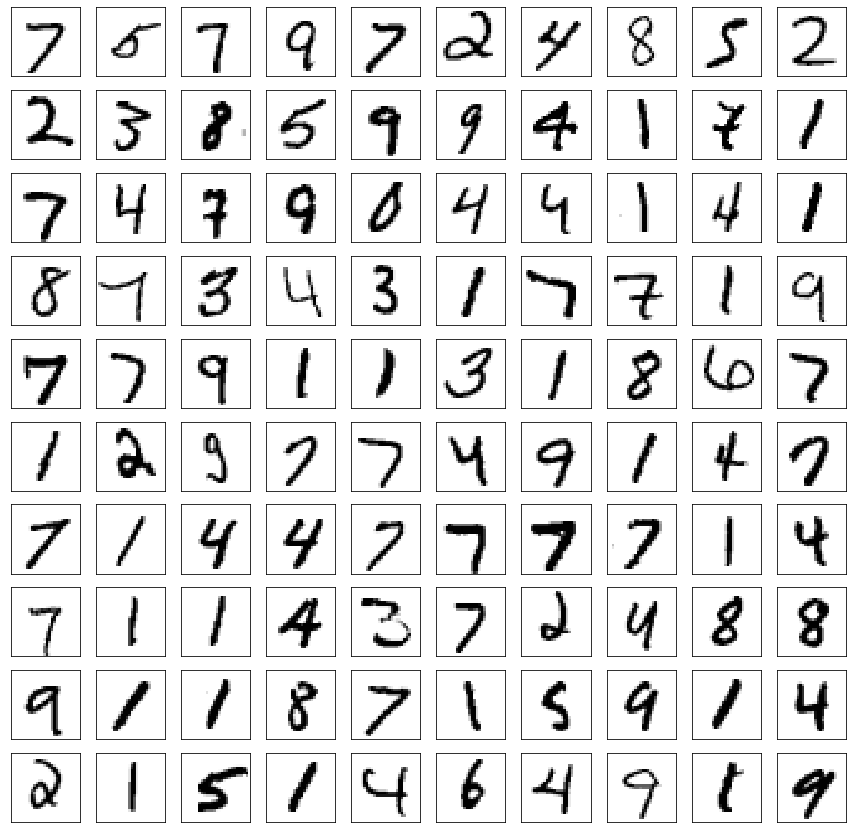

In [109]:
plot_digits_in_cluster(0)

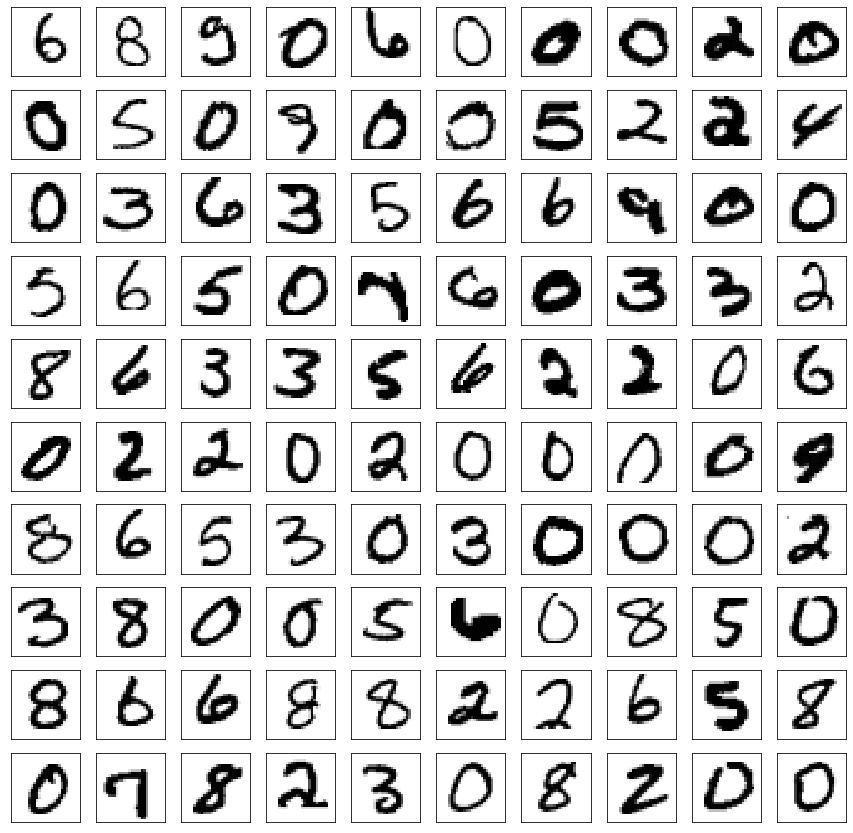

In [110]:
plot_digits_in_cluster(1)